In [85]:
import skimage
import skimage.io
import skimage.transform
import os
import numpy as np
import utils
import matplotlib.pyplot as plt

Saving image to: image_processed\moon_filtered.png


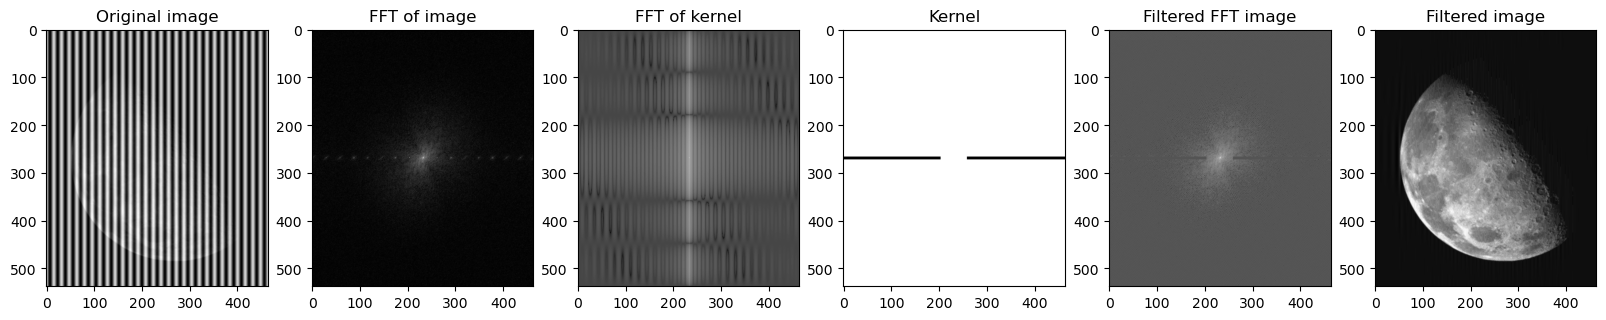

In [86]:
if __name__ == "__main__":
    # DO NOT CHANGE
    impath = os.path.join("images", "noisy_moon.png")
    im = utils.read_im(impath)

    ### START YOUR CODE HERE ### (You can change anything inside this block)
    im_fft = np.fft.fft2(im)

    #Creating a kernel filled with ones
    kernel = np.ones(im.shape)

    #Want a horizontal line to go through middle of im_fft to remove periodic noise except from a segment in the middle of the line
    line_height = 3 #Half of height of line
    middle_width = 55 #Width of the segment in the middle that does not remove to preserve mean frequency found in middle of im_fft

    #Adding 0 through the middle of the kernel with height 2*line_height
    start_row = (im.shape[0] - line_height)//2
    end_row = start_row + 2*line_height
    kernel[start_row:end_row, :] = 0

    #Making a middle segment of line 1 to preserve mean frequency
    start_col = (im.shape[1] - middle_width) // 2
    end_col = start_col + middle_width
    kernel[start_row:end_row, start_col:end_col] = 1

    #Need to shift the kernel
    shift_kernel = np.fft.ifftshift(kernel)

    #FFT of kernel for visualising
    fft_kernel = np.fft.fft2(shift_kernel)

    result_fft = im_fft * shift_kernel # Convolving
    conv_result = np.fft.ifft2(result_fft).real # Reversing the fourier transform

    im_filtered = conv_result

    ### PRINTING ###
    #This was taken from ../tutorials/frequency_domain.ipynb
    def magnitude(fft_im):
        real = fft_im.real
        imag = fft_im.imag
        return np.sqrt(real**2 + imag**2)

    # Use plt.subplot to place two or more images beside eachother
    plt.figure(figsize=(20, 4))
    # plt.subplot(num_rows, num_cols, position (1-indexed))

    # Visualize image
    plt.subplot(1, 6, 1)
    plt.title("Original image")
    plt.imshow(im, cmap="gray")

    # Visualize FFT
    plt.subplot(1, 6, 2)
    plt.title("FFT of image")
    plt.imshow(np.fft.fftshift(np.log(magnitude(im_fft) + 1)), cmap="gray")

    # Visualize FFT kernel
    plt.subplot(1, 6, 3)
    plt.title("FFT of kernel")
    plt.imshow(np.fft.fftshift(np.log(fft_kernel + 1)).real, cmap="gray")

    # Visualize kernel
    plt.subplot(1, 6, 4)
    plt.title("Kernel")
    plt.imshow(kernel.real, cmap="gray")

    # Visualize filtered FFT image
    plt.subplot(1, 6, 5)
    plt.title("Filtered FFT image")
    plt.imshow(np.fft.fftshift(np.log(result_fft + 1)).real, cmap="gray")

    # Visualize filtered spatial image
    plt.subplot(1, 6, 6)
    plt.title("Filtered image")
    plt.imshow(conv_result, cmap="gray")


    ### END YOUR CODE HERE ###
    utils.save_im("moon_filtered.png", utils.normalize(im_filtered))